<a href="https://colab.research.google.com/github/MrToffel/colab-KI/blob/main/sudoku-ki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trainingsprogramm

In [ ]:
import tensorflow as tf
import glob
import cv2
import numpy as np
import random
import os
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

gen=True

input = []
size = int(300 / 9)
if(gen==True):
    for q in range(5):     #wiederholungen
        for x in range(1, 11):  #zeichen
            for y in range(0, 7):   #schriftarten
                for s in range(10):     #skalierungen
                    for p in range(6):      #Dicke
                        for i in range(4):      #blur
                           textSize = cv2.getTextSize(text=str(), fontFace=y, fontScale=1, thickness=1)[0]
                
                           img = np.zeros(shape=[size*5, size*5], dtype=np.uint8)
                           
                           img[:]=random.randint(50,150)
                           pos = [int(size *5* (1-float(0.2 + s / 20)) / 2.0),int(size *5* (1-(1 - float(0.2 + s / 20)) / 2.0))]
                           
                           
                           if(x != 10):
                               s = float(s)
                               img = cv2.putText(img,str(x),(pos[0],pos[1]),y,size*5 / textSize[1] * (0.2 + s / 20),random.randint(190,255),int(1+p+int(s/2)))
            
                           for z in range(15):
                               img = cv2.circle(img, (random.randint(0,size*5),random.randint(0,size*5)), 5, random.randint(100,220), -1)

                           img=cv2.resize(img,(size,size))

                           rx1=random.randint(0,4)
                           ry1=random.randint(0,4)
                           rx2=random.randint(0,4)
                           ry2=random.randint(size-4,size)
                           if(random.randint(0,2)==1):
                            img=cv2.line(img,(rx1,ry1),(rx2,ry2),random.randint(0,255),random.randint(1,5))
                          
                           rx1=random.randint(0,4)
                           ry1=random.randint(0,4)
                           rx2=random.randint(size-4,size)
                           ry2=random.randint(0,4)
                           if(random.randint(0,2)==1):
                            img=cv2.line(img,(rx1,ry1),(rx2,ry2),random.randint(0,255),random.randint(1,5))
                          
                           rx1=random.randint(size-4,size)
                           ry1=random.randint(size-4,size)
                           rx2=random.randint(0,4)
                           ry2=random.randint(size-4,size)
                           if(random.randint(0,2)==1):
                            img=cv2.line(img,(rx1,ry1),(rx2,ry2),random.randint(0,255),random.randint(1,5))
                          
                           rx1=random.randint(size-4,size)
                           ry1=random.randint(size-4,size)
                           rx2=random.randint(size-4,size)
                           ry2=random.randint(0,4)
                           if(random.randint(0,2)==1):
                            img=cv2.line(img,(rx1,ry1),(rx2,ry2),random.randint(0,255),random.randint(1,5))
                           
                           if(i > 1):
                               img = cv2.blur(img,(i,i))
                               

                           input.append((img,x-1))
cv2.destroyAllWindows()                        


model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(size,size,1)))

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255.0))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.01))
model.add(tf.keras.layers.experimental.preprocessing.RandomTranslation(0.2,0.2))

model.add(tf.keras.layers.Conv2D(32,(3,3),strides=1,use_bias=True)) 
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32,(3,3),strides=1,use_bias=True)) 
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,tf.keras.layers.Activation("relu")))
model.add(tf.keras.layers.Dense(10,tf.keras.layers.Activation("softmax")))
  

model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])


input = np.array(input)
np.random.shuffle(input)
tx = []
ty = []
for i in input:
    tx.append(i[0])
    ty.append(i[1])

tx = np.array(tx)
ty = np.array(ty)
tx = np.reshape(tx,(len(tx),size,size,1))

model.fit(tx,ty,epochs=100,verbose=2,batch_size=512)
model.summary()
model.save("model-300")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Epoch 1/100
165/165 - 37s - loss: 2.2490 - accuracy: 0.1527
Epoch 2/100
165/165 - 4s - loss: 1.9618 - accuracy: 0.2812
Epoch 3/100
165/165 - 4s - loss: 1.5511 - accuracy: 0.4642
Epoch 4/100
165/165 - 4s - loss: 1.2079 - accuracy: 0.5968
Epoch 5/100
165/165 - 4s - loss: 1.0095 - accuracy: 0.6743
Epoch 6/100
165/165 - 4s - loss: 0.8902 - accuracy: 0.7167
Epoch 7/100
165/165 - 4s - loss: 0.8139 - accuracy: 0.7432
Epoch 8/100
165/165 - 4s - loss: 0.7600 - accuracy: 0.7625
Epoch 9/100
165/165 - 4s - loss: 0.7087 - accuracy: 0.7798
Epoch 10/100
165/165 - 4s - loss: 0.6714 - accuracy: 0.7941
Epoch 11/100
165/165 - 4s - loss: 0.6471 - accuracy: 0.8017
Epoch 12/100
165/165 - 4s - loss: 0.6163 - accuracy: 0.8112
Epoch 13/100
165/165 - 4s - loss: 0.5936 - accuracy: 0.8167
Epoch 14/100
165/165 - 4s - loss: 0.5692 - accuracy: 0.8255
Epoch 15/100
165/165 - 4s - loss: 0.5393 - accuracy: 0.8361
Epoch 16/100
165/165 - 4s - loss: 0.5251 - accuracy: 0.8404
Epoch 17/100
165/165 - 4s - loss: 0.5065 - accur

INFO:tensorflow:Assets written to: model-300/assets


INFO:tensorflow:Assets written to: model-300/assets


Ausführendes Programm

In [7]:
#bild laden
!wget "https://github.com/MrToffel/colab-KI/raw/main/input%20(2).jpg"
!mv "input (2).jpg" input.jpg

--2021-03-19 16:05:49--  https://github.com/MrToffel/colab-KI/raw/main/input%20(2).jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MrToffel/colab-KI/main/input%20(2).jpg [following]
--2021-03-19 16:05:50--  https://raw.githubusercontent.com/MrToffel/colab-KI/main/input%20(2).jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214951 (210K) [image/jpeg]
Saving to: ‘input (2).jpg’

input (2).jpg       100%[===================>] 209.91K  --.-KB/s    in 0.005s  

2021-03-19 16:05:50 (37.6 MB/s) - ‘input (2).jpg’ saved [214951/214951]



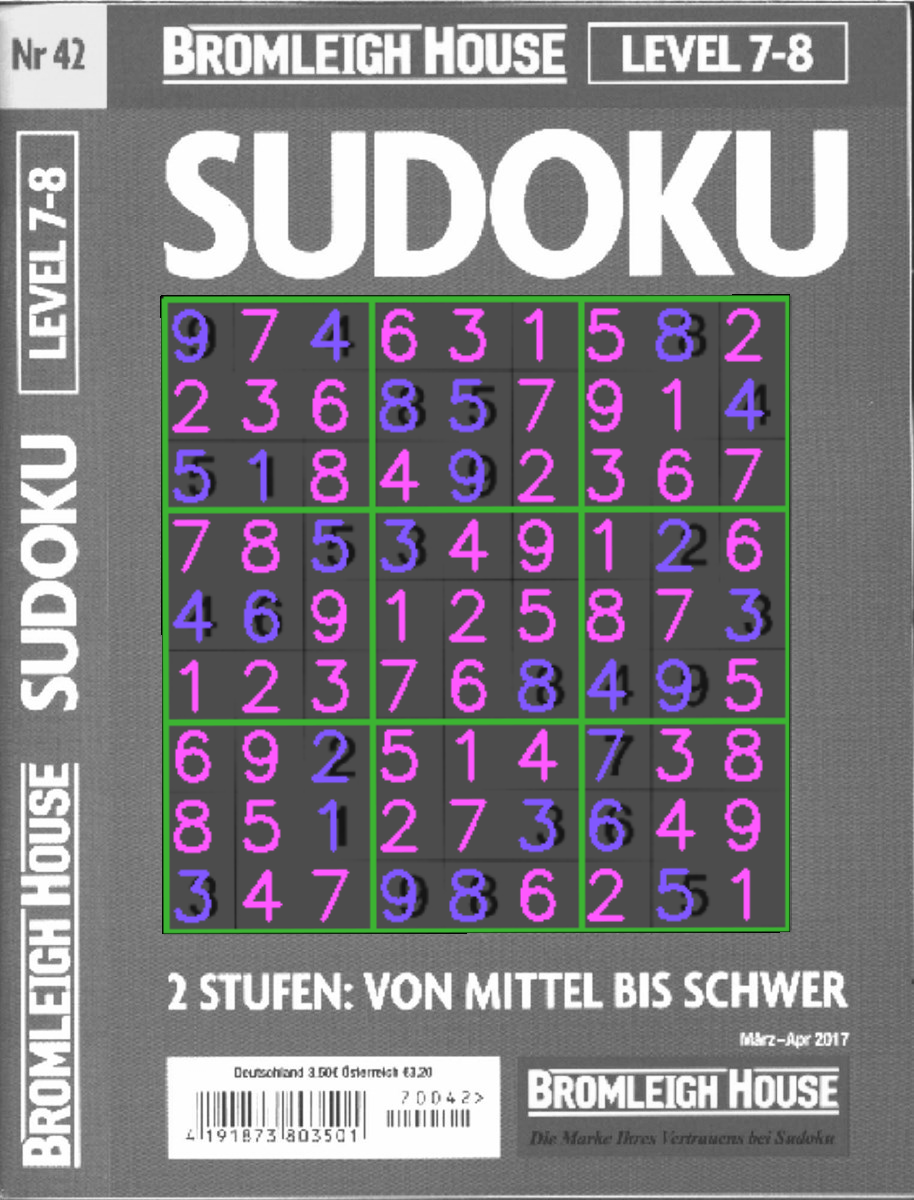

In [11]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

zsize=300

class feld:
	def __init__(self,_id,_x,_y,_num = 0, _v = False):
		self.id = _id
		self.num = _num
		self.v = _v
		self.x = _x
		self.y = _y
	
	anfang_da = False
	x = 0
	y = 0
	id = 0
	num = 0
	v = False

class feld_liste_q:
	x = 0 
	y = 0
	felder = []

class feld_liste_h:
	i = 0
	felder = []

class feld_liste_v:
	i = 0
	felder = []

fh = []
fv = []
fq = []

def clv():
	for i in range(9):
		for o in range(9):
			fh[i].felder[o].v = False
			fv[o].felder[i].v = False
			fq[i].felder[o].v = False

def setv(id, num):
	for i in range(9):
		for o in range(9):
			if (fh[i].felder[o].id == id):
				fh[i].felder[o].v = num
			if (fv[i].felder[o].id == id):
				fv[i].felder[o].v = num
			if (fq[i].felder[o].id == id):
				fq[i].felder[o].v = num
		
def setf(id, num, anfangda=False):
	
	for i in range(9):
		for o in range(9):
			if (fh[i].felder[o].id == id):
				fh[i].felder[o].num = num
				fh[i].felder[o].anfang_da = anfangda
			if (fv[i].felder[o].id == id):
				fv[i].felder[o].num = num
				fv[i].felder[o].anfang_da = anfangda
			if (fq[i].felder[o].id == id):
				fq[i].felder[o].num = num
				fq[i].felder[o].anfang_da = anfangda
				
def set(num):
	clv()
	for i in range(9):
		for o in range(9):
			if (fq[i].felder[o].num == num):
				for t in range(9):
					setv(fq[i].felder[t].id, True)
					setv(fv[fq[i].felder[o].x].felder[t].id, True)
					setv(fh[fq[i].felder[o].y].felder[t].id, True)

	for i in range(9):
		frei = 0
		idt = 0
		for o in range(9):
			if (fq[i].felder[o].v == False):
				if(fq[i].felder[o].num == 0):
					frei+=1
					idt = fq[i].felder[o].id
		if (frei == 1):
			setf(idt, num)
			return
		
	for i in range(9):
		frei = 0
		idt = 0
		for o in range(9):
			if (fh[i].felder[o].v == False):
				if(fh[i].felder[o].num == 0):
					frei+=1
					idt = fh[i].felder[o].id
		
		if (frei == 1):
			setf(idt, num)
			return
		

	for i in range(9):
		frei = 0
		idt = 0
		for o in range(9):
			if (fv[i].felder[o].v == False):
				if(fv[i].felder[o].num == 0):
					frei+=1
					idt = fv[i].felder[o].id
		
		if (frei == 1):
			setf(idt, num)
			return

def prep():
	for y in range(3):
		for x in range(3):
			q = feld_liste_q()
			q.x = x
			q.y = y
			q.felder=[]
			fq.append(q)

		
	for i in range(9):
		v = feld_liste_v()
		v.i = i
		v.felder=[]
		fv.append(v)

		h = feld_liste_h()
		h.i = i
		h.felder=[]
		fh.append(h)
	
	
	total = 0
	
	for y in range(9):
		for x in range(9):
			f = feld(total, x, y)
			total+=1
			for b in range(9):
				if (fh[b].i == y):
					fh[b].felder.append(f)
				if (fv[b].i == x):
					fv[b].felder.append(f)
	
			if (x < 3):
				if (y < 3):
					fq[0].felder.append(f)
								
				
				elif (y < 6):
						fq[1].felder.append(f)
							
				else:
						fq[2].felder.append(f)
						
			elif (x < 6):
				if (y < 3):
					fq[3].felder.append(f)
								
				
				elif (y < 6):
						fq[4].felder.append(f)
							
				else:
						fq[5].felder.append(f)						
				
			else:
				if (y < 3):
					fq[6].felder.append(f)
				
				elif (y < 6):
					fq[7].felder.append(f)
						
				else:
					fq[8].felder.append(f)
	
def sove():
	fertig = False
	num0v=0
	while (fertig == False):
		fertig = True
		for i in range(1,10):
			set(i)
		num0n=0
		for i in range(9):
			for o in range(9):
				if (fq[i].felder[o].num == 0):
					num0n+=1
					fertig = False
		if (num0n==num0v):
			return False

		num0v=num0n
	return True	

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

model = tf.keras.models.load_model("model-300")	

prep()

img = cv2.imread("input.jpg")
h,w,tmp=img.shape

#blur, graustufen, schwarz-weiß
#imagecopy = cv2.GaussianBlur(imagecopy,(3,3),0)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imagecopy = img.copy()
imagecopy = cv2.adaptiveThreshold(imagecopy,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,7,3)
#Sudoku-Feld als BLOB erkennen mit floodfill (binary large object)
#Das Feld wird hierbei als größtes BLOB angenommen
maxf = 0    #maximal gefüllte Pixelzahl
p = (0,0)   #punkt an dem floodfill ein maximum hat
for x in range(w):
   for y in range(h):
       if(imagecopy[y,x] == 0):
           #res[0] speichert Anzahl der gefüllten Pixel
            #mit beliebiger farbe füllen (180)
           #die neue Farbe (180) verbessert deutlich die Leistung weil
           #gefüllte Pixel nicht neu geprüft werden
           res = cv2.floodFill(imagecopy,None,(x,y),180)
          
           #größte gefüllte Fläche?
           if(res[0] > maxf):
               maxf = res[0]
               p = (x,y)
#Größtes BLOB mit 100 füllen
cv2.floodFill(imagecopy,None,p,100)
			
#äußerste Punkte des Feldes (oben rechts / links, unten rechts / links)
o_r = (w / 2,h / 2, w / 2 + h / 2)
o_l = (w / 2,h / 2, w / 2 + h / 2)
u_r = (w / 2,h / 2, w / 2 + h / 2)
u_l = (w / 2,h / 2, w / 2 + h / 2)
#die äußersten Punkte werden berechnet, indem bei jedem Pixel des Feldes
#die Abstände zu den Ecken summiert werden
#bei den äußersten Punkten ist die Summe minimal
	
#Alles außer das Feld löschen
for x in range(w):
  for y in range(h):
    if(imagecopy[y,x] == 100): #Feld ist als größter BLOB 100
		#img[y,x]=255					
      diff_o_r = x + y
      if(o_r[2] > diff_o_r):
        o_r = (x,y,diff_o_r)
		
      diff_o_l = w - x + y
      if(o_l[2] > diff_o_l):
        o_l = (x,y,diff_o_l)
		
      diff_u_r = x + h - y
      if(u_r[2] > diff_u_r):
        u_r = (x,y,diff_u_r)
		
      diff_u_l = w - x + h - y
      if(u_l[2] > diff_u_l):
        u_l = (x,y,diff_u_l)
			

tmp=img.copy()
tmp=cv2.cvtColor(tmp,cv2.COLOR_GRAY2RGB)
tmp = cv2.line(tmp,(int(o_r[0]),int(o_r[1])),(int(o_l[0]),int(o_l[1])),(50,180,60),3)
tmp = cv2.line(tmp,(int(o_l[0]),int(o_l[1])),(int(u_l[0]),int(u_l[1])),(50,180,60),3)
tmp = cv2.line(tmp,(int(u_l[0]),int(u_l[1])),(int(u_r[0]),int(u_r[1])),(50,180,60),3)
tmp = cv2.line(tmp,(int(u_r[0]),int(u_r[1])),(int(o_r[0]),int(o_r[1])),(50,180,60),3)
	#perspektivisches drehen und skalieren
p4 = np.float32([[o_l[0],o_l[1]],[o_r[0],o_r[1]],[u_r[0],u_r[1]],[u_l[0],u_l[1]]])
p42 = np.float32([[zsize,0],[0,0],[0,zsize],[zsize,zsize]])
mat = cv2.getPerspectiveTransform(p4,p42)

wp = img.copy()
wp = cv2.warpPerspective(wp,mat,(zsize,zsize))	#hiermit werden Zahlen erkannt
wpcopy2 = wp.copy() #hier werden die fertigen Zahlen reingezeichnet
wpcopy2=cv2.cvtColor(wpcopy2,cv2.COLOR_GRAY2RGB)
wp = cv2.bitwise_not(wp)
ksize = int(zsize / 9)
train_collect=[]
for y in range(9):
 for x in range(9):
	#zuschneiden
    start_row,start_col = int(y * ksize),int(x * ksize)
    end_row,end_col = int(y * ksize + ksize),int(x * ksize + ksize)
    cropped = wp[start_row:end_row,start_col:end_col]
	
    croppedcopy = np.array(cropped)
    croppedcopy = np.reshape(croppedcopy,(1,ksize,ksize,1))
    
    predictions = model.predict(croppedcopy)
    score = predictions[0]
    ergebnis = np.argmax(score)
    	#ins Sudoku eintragen
    e = int(["1","2","3","4","5","6","7","8","9","0"][ergebnis])
    if(e!=0):
      setf(int(y * 9 + x),e ,True)
    else:
      setf(int(y * 9 + x),0 ,False)
	
		
	#Grau-halbdurchsichtiges Overlay um Zahlen besser zu erkennen
wpc=wpcopy2.copy()
cv2.rectangle(wpcopy2, (0, 0), (zsize, zsize), (0, 0, 0),-1)
wpcopy2=cv2.addWeighted(wpcopy2,0.7,wpc,0.3,0)
	
	
	
#Feld nachzeichnen
cv2.rectangle(wpcopy2,(1,1),((zsize-1),(zsize-1)),(50,180,60),2)
cv2.line(wpcopy2,(int(zsize / 3),1),    (int(zsize / 3),(zsize-1)),(50,180,60),2)
cv2.line(wpcopy2,(int(zsize / 3) * 2,1),  (int(zsize / 3) * 2,(zsize-1)),(50,180,60),2)
cv2.line(wpcopy2,(1,int(zsize / 3)),    ((zsize-1),int(zsize / 3)),(50,180,60),2)
cv2.line(wpcopy2,(1,int(zsize / 3) * 2),  ((zsize-1),int(zsize / 3) * 2),(50,180,60),2)
	
#Zahlen eintragen
for i in range(9):
  for o in range(9):
    if(fh[i].felder[o].num!=0):
      textSize = cv2.getTextSize(text=str(fh[i].felder[o].num), fontFace=0, fontScale=1, thickness=2)[0]
      if(fh[i].felder[o].anfang_da):
        col = (255, 88, 129)
      else:
        col = (255, 88, 255)
        
      wpcopy2 = cv2.putText(wpcopy2,str(fh[i].felder[o].num),(int((o+0.1) * ksize),int((i + 0.9) * ksize)),0,(ksize / textSize[1] * 0.7),col,2)

#perspektivisches Drehen rückgängig machen
p4 = np.float32([[o_l[0],o_l[1]],[o_r[0],o_r[1]],[u_r[0],u_r[1]],[u_l[0],u_l[1]]])
p42 = np.float32([[zsize,0],[0,0],[0,zsize],[zsize,zsize]])
mat = cv2.getPerspectiveTransform(p42,p4)
wp = cv2.warpPerspective(wpcopy2,mat,(w,h))
#Ursprüngliches Bild wiederherstellen
for x in range(w):
   for y in range(h):
       if(wp[y,x,0] == 0):
               wp[y,x] = img[y,x]


fehler=True
#Sudoku lösen
if(sove()==True):
  fehler=False
	

#Zahlen eintragen
for i in range(9):
  for o in range(9):
    if(fh[i].felder[o].num!=0):
      textSize = cv2.getTextSize(text=str(fh[i].felder[o].num), fontFace=0, fontScale=1, thickness=2)[0]
      if(fh[i].felder[o].anfang_da):
        col = (255, 88, 129)
      else:
        col = (255, 88, 255)
      wpcopy2 = cv2.putText(wpcopy2,str(fh[i].felder[o].num),(int((o+0.1) * ksize),int((i + 0.9) * ksize)),0,(ksize / textSize[1] * 0.7),col,2)
	
			
#perspektivisches Drehen rückgängig machen
p4 = np.float32([[o_l[0],o_l[1]],[o_r[0],o_r[1]],[u_r[0],u_r[1]],[u_l[0],u_l[1]]])
p42 = np.float32([[zsize,0],[0,0],[0,zsize],[zsize,zsize]])
mat = cv2.getPerspectiveTransform(p42,p4)
wp = cv2.warpPerspective(wpcopy2,mat,(w,h))

#Ursprüngliches Bild wiederherstellen
for x in range(w):
  for y in range(h):
    if(wp[y,x,0] == 0):
      wp[y,x] = img[y,x]
if(fehler):
  wp = cv2.putText(wp,str("Fehler"),(10,h-10),0,4,(100,100,300),5)  		
#zeigen

cv2_imshow(wp)
	

